### Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.


### Difference between Linear Regression and Logistic Regression:

#### Linear Regression:

- Type: Regression model.
1. Output: Predicts a continuous outcome.
2. Function: Models the relationship between the dependent variable and one or more independent variables.


#### Logistic Regression:

1. Type: Classification model.
2. Output: Predicts the probability of an instance belonging to a particular category.
3. Function: Models the probability that the dependent variable belongs to a particular category.


#### Example Scenario:

- Linear Regression: Predicting house prices based on features like square footage, number of bedrooms, etc.
- Logistic Regression: Predicting whether an email is spam or not based on features like sender, subject, and content.


### Q2. What is the cost function used in logistic regression, and how is it optimized?


#### Cost function in Logistic Regression and Optimization:
**Cost Function (Log Loss):**
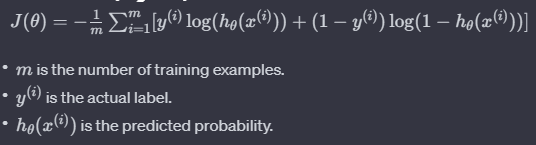

**Optimization:**

- Gradient Descent or other optimization algorithms are used to minimize the cost function.


In [1]:
# Python code for logistic regression cost function
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return J



### Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.


#### Regularization in Logistic Regression:
**Concept:**

- Regularization adds a penalty term to the cost function to avoid overfitting.
- Two types: L1 regularization (Lasso) and L2 regularization (Ridge).

In [3]:
# Python code for logistic regression with L2 regularization
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y)


NameError: name 'X' is not defined


### Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?


#### ROC Curve in Logistic Regression:
**Concept:**

- ROC (Receiver Operating Characteristic) curve plots the true positive rate against the false positive rate.
- AUC (Area Under the Curve) is used to quantify the ROC curve.

In [4]:
# Python code for ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


NameError: name 'X_test' is not defined


### Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?


#### Feature Selection in Logistic Regression:
**Techniques:**

1. Recursive Feature Elimination (RFE)
2. L1 Regularization (Lasso)
3. Feature Importance from Tree-Based Models

In [5]:
# Python code for feature selection using L1 regularization
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', C=1.0)
model.fit(X_train, y_train)
selected_features = X.columns[model.coef_[0] != 0]


NameError: name 'X_train' is not defined


### Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?


#### Handling Imbalanced Datasets in Logistic Regression:
- Logistic regression, like many machine learning algorithms, can be sensitive to imbalanced datasets where one class significantly outnumbers the other. This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. Here are some strategies for dealing with class imbalance:

**Resampling:**

- Oversampling the minority class: Increase the number of instances in the minority class by randomly duplicating them or generating synthetic examples.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

- **Undersampling the majority class**: Reduce the number of instances in the majority class randomly.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

**Synthetic Minority Over-sampling Technique (SMOTE):**
- Generate synthetic examples for the minority class to balance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**Different Evaluation Metrics:**
- Instead of accuracy, use metrics that consider both false positives and false negatives, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC).

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

- Adjust the decision threshold based on the specific needs of the problem. This can help balance precision and recall.

In [ ]:
# Adjust decision threshold
y_probs = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_probs > 0.4).astype(int)

**Class Weights:**
- Assign different weights to classes to make the algorithm more sensitive to the minority class.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

**These strategies should be chosen based on the characteristics of the dataset and the goals of the analysis. Experimentation and validation with appropriate metrics are crucial to finding the most effective approach for a specific imbalanced dataset.**

**Some Strategies:**

1. Resampling (oversampling minority or undersampling majority class).
2. Synthetic Minority Over-sampling Technique (SMOTE).
3. Using different evaluation metrics (precision, recall, F1-score).


### Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

#### 1. Multicollinearity:

**Issue:**
- Multicollinearity occurs when two or more independent variables in the model are highly correlated. This can cause problems in estimating the coefficients accurately.
**Solution:**
- Identify and assess multicollinearity using techniques like variance inflation factor (VIF). If high multicollinearity is detected, consider removing one of the correlated variables or using dimensionality reduction techniques like principal component analysis (PCA).

#### 1. Overfitting:

**Issue:**
- Logistic regression models may become too complex and fit the training data too closely, leading to poor generalization on new data.
**Solution:**
- Regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization can be applied to penalize overly complex models and prevent overfitting.

#### 1. Underfitting:

**Issue:**
- On the other hand, logistic regression models may be too simple to capture the underlying patterns in the data, leading to poor predictive performance.
**Solution:**
- Increase the complexity of the model by adding more relevant features or polynomial terms to better fit the data.

#### 1. Imbalanced Classes:

**Issue:**
- If the classes in the target variable are imbalanced (one class is significantly more frequent than the other), the model may be biased towards the majority class.
**Solution:**
- Use techniques like oversampling the minority class, undersampling the majority class, or using synthetic data generation methods to balance the class distribution.

#### 1. Outliers:

**Issue:**
- Outliers can disproportionately influence the logistic regression coefficients and model performance.
**Solution:**
- Identify and handle outliers using techniques such as removing extreme values, transforming variables, or using robust regression methods.

#### 1. Non-linearity:

**Issue:**
- Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. If the relationship is non-linear, the model may not perform well.
**Solution:**
- Transform variables or use polynomial terms to capture non-linear relationships. Alternatively, consider using non-linear models like decision trees or support vector machines.

#### 1. Model Interpretability:

**Issue:** 
- Logistic regression coefficients are easily interpretable, but in the presence of correlated variables or interactions, interpretation can become complex.
**Solution:**
- Carefully interpret coefficients, use domain knowledge, and consider interaction terms. Visualization techniques such as partial dependence plots can also aid in interpretation.

#### 1. Data Quality:

**Issue:**
- Poor quality data, including missing values and measurement errors, can affect the performance of logistic regression models.
**Solution:**
- Address missing data through imputation or removal of affected observations. Clean and preprocess data to ensure accuracy.

**Addressing these challenges requires a combination of statistical techniques, domain knowledge, and a thoughtful approach to model building and evaluation. Regular validation using techniques like cross-validation is crucial to ensure the model's performance on new data.**